In [4]:
!pip install sentence-transformers networkx scikit-learn matplotlib pandas


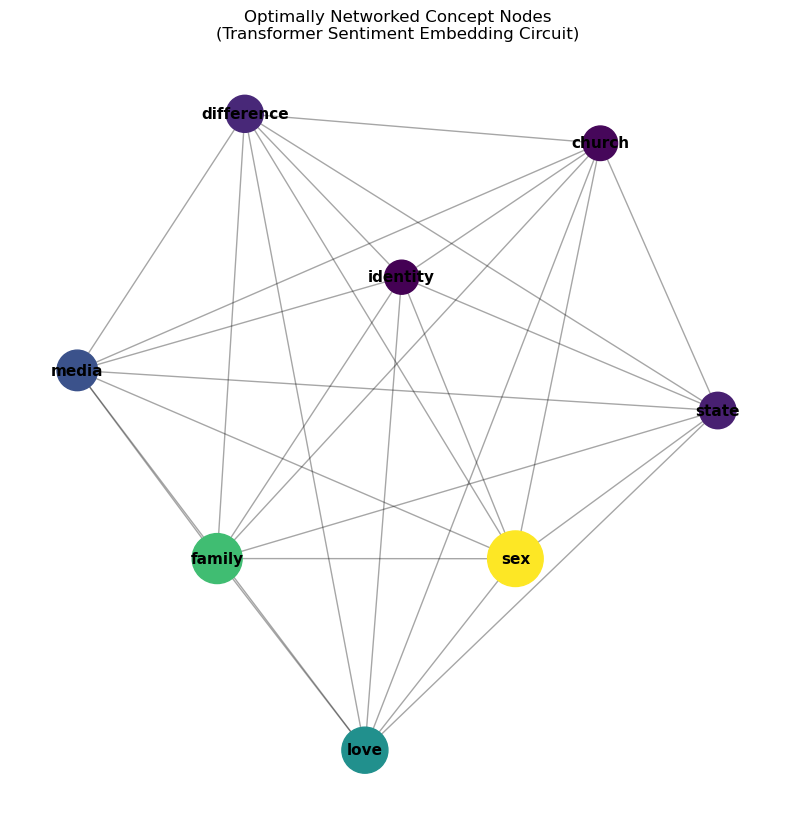

In [5]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

concept_words = [
    "church",
    "state",
    "family",
    "media",
    "identity",
    "difference",
    "sex",
    "love"
]

model = SentenceTransformer("all-MiniLM-L6-v2")

embeddings = model.encode(
    concept_words,
    normalize_embeddings=True
)

similarity_matrix = cosine_similarity(embeddings)

G = nx.Graph()

# Add nodes
for word in concept_words:
    G.add_node(word)

# Add weighted edges (closed circuit)
for i, w1 in enumerate(concept_words):
    for j, w2 in enumerate(concept_words):
        if i < j:
            G.add_edge(
                w1,
                w2,
                weight=float(similarity_matrix[i, j])
            )
# Influence
eigen = nx.eigenvector_centrality_numpy(G, weight="weight")
# Sentiment accessibility
closeness = nx.closeness_centrality(G)
# Affective mediation
betweenness = nx.betweenness_centrality(G, weight="weight")

def normalize(metric):
    values = np.array(list(metric.values()))
    return {
        k: (v - values.min()) / (values.max() - values.min() + 1e-9)
        for k, v in metric.items()
    }

eigen_n = normalize(eigen)
close_n = normalize(closeness)
between_n = normalize(betweenness)

optimal_score = {
    node: (eigen_n[node] + close_n[node] + between_n[node]) / 3
    for node in G.nodes
}

results = (
    pd.DataFrame({
        "concept": list(G.nodes),
        "optimal_network_score": [optimal_score[n] for n in G.nodes],
        "eigenvector": [eigen[n] for n in G.nodes],
        "closeness": [closeness[n] for n in G.nodes],
        "betweenness": [betweenness[n] for n in G.nodes],
    })
    .sort_values("optimal_network_score", ascending=False)
    .reset_index(drop=True)
)

results

plt.figure(figsize=(10, 10))

pos = nx.spring_layout(G, weight="weight", seed=42)

node_sizes = [
    3000 * optimal_score[node] + 600
    for node in G.nodes
]

node_colors = list(optimal_score.values())

nx.draw_networkx_nodes(
    G,
    pos,
    node_size=node_sizes,
    node_color=node_colors,
    cmap="viridis"
)

nx.draw_networkx_edges(
    G,
    pos,
    alpha=0.35
)

nx.draw_networkx_labels(
    G,
    pos,
    font_size=11,
    font_weight="bold"
)

plt.title("Optimally Networked Concept Nodes\n(Transformer Sentiment Embedding Circuit)")
plt.axis("off")
plt.show()



In [6]:
results

,concept,optimal_network_score,eigenvector,closeness,betweenness
0,sex,0.333333,0.414877,1.0,0.0
1,family,0.231347,0.386100,1.0,0.0
2,love,0.166168,0.367708,1.0,0.0
3,media,0.083914,0.344499,1.0,0.0
4,difference,0.036962,0.331250,1.0,0.0
5,state,0.029286,0.329084,1.0,0.0
6,church,0.005725,0.322436,1.0,0.0
7,identity,0.000000,0.320821,1.0,0.0


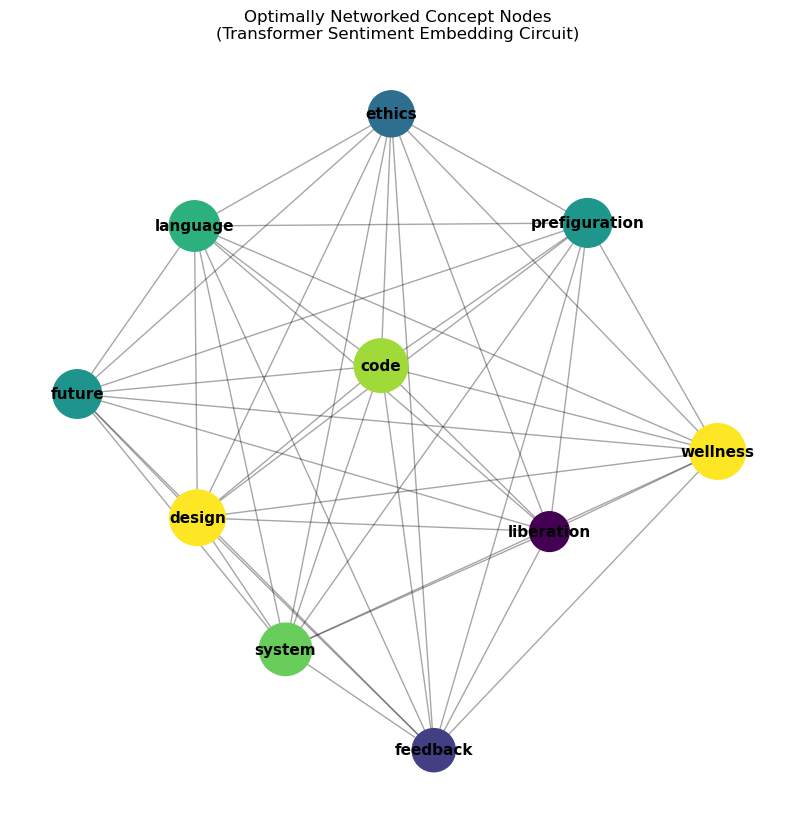

In [7]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

concept_words = [
    "ethics",
    "wellness",
    "design",
    "future",
    "prefiguration",
    "language",
    "feedback",
    "system",
    "code",
    "liberation"
]

model = SentenceTransformer("all-MiniLM-L6-v2")

embeddings = model.encode(
    concept_words,
    normalize_embeddings=True
)

similarity_matrix = cosine_similarity(embeddings)

G = nx.Graph()

# Add nodes
for word in concept_words:
    G.add_node(word)

# Add weighted edges (closed circuit)
for i, w1 in enumerate(concept_words):
    for j, w2 in enumerate(concept_words):
        if i < j:
            G.add_edge(
                w1,
                w2,
                weight=float(similarity_matrix[i, j])
            )
# Influence
eigen = nx.eigenvector_centrality_numpy(G, weight="weight")
# Sentiment accessibility
closeness = nx.closeness_centrality(G)
# Affective mediation
betweenness = nx.betweenness_centrality(G, weight="weight")

def normalize(metric):
    values = np.array(list(metric.values()))
    return {
        k: (v - values.min()) / (values.max() - values.min() + 1e-9)
        for k, v in metric.items()
    }

eigen_n = normalize(eigen)
close_n = normalize(closeness)
between_n = normalize(betweenness)

optimal_score = {
    node: (eigen_n[node] + close_n[node] + between_n[node]) / 3
    for node in G.nodes
}

results = (
    pd.DataFrame({
        "concept": list(G.nodes),
        "optimal_network_score": [optimal_score[n] for n in G.nodes],
        "eigenvector": [eigen[n] for n in G.nodes],
        "closeness": [closeness[n] for n in G.nodes],
        "betweenness": [betweenness[n] for n in G.nodes],
    })
    .sort_values("optimal_network_score", ascending=False)
    .reset_index(drop=True)
)

results

plt.figure(figsize=(10, 10))

pos = nx.spring_layout(G, weight="weight", seed=42)

node_sizes = [
    3000 * optimal_score[node] + 600
    for node in G.nodes
]

node_colors = list(optimal_score.values())

nx.draw_networkx_nodes(
    G,
    pos,
    node_size=node_sizes,
    node_color=node_colors,
    cmap="viridis"
)

nx.draw_networkx_edges(
    G,
    pos,
    alpha=0.35
)

nx.draw_networkx_labels(
    G,
    pos,
    font_size=11,
    font_weight="bold"
)

plt.title("Optimally Networked Concept Nodes\n(Transformer Sentiment Embedding Circuit)")
plt.axis("off")
plt.show()



In [8]:
results

,concept,optimal_network_score,eigenvector,closeness,betweenness
0,wellness,0.333333,0.246209,1.0,0.138889
1,design,0.333333,0.380577,1.0,0.000000
2,code,0.296540,0.365745,1.0,0.000000
3,system,0.274115,0.356705,1.0,0.000000
4,language,0.239542,0.342769,1.0,0.000000
5,prefiguration,0.209614,0.250084,1.0,0.083333
6,future,0.207030,0.329663,1.0,0.000000
7,ethics,0.166146,0.286309,1.0,0.027778
8,feedback,0.120928,0.294955,1.0,0.000000
9,liberation,0.072451,0.275414,1.0,0.000000


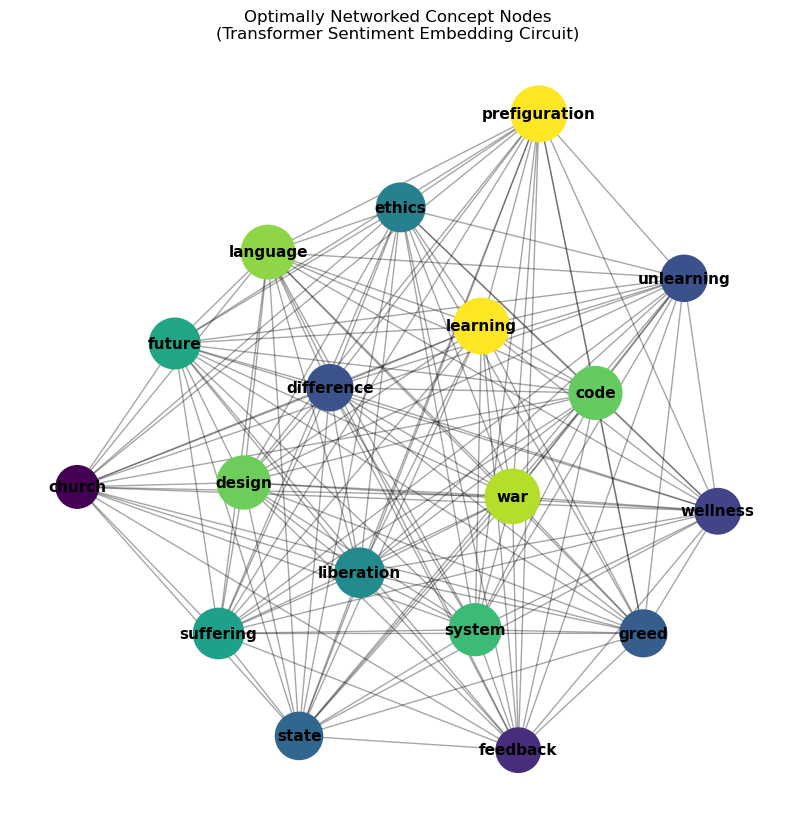

In [9]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

concept_words = [
    "ethics",
    "wellness",
    "design",
    "future",
    "prefiguration",
    "language",
    "feedback",
    "system",
    "code",
    "liberation",
    "war",
    "suffering",
    "difference",
    "church",
    "state",
    "greed",
    "learning",
    "unlearning"
]

model = SentenceTransformer("all-MiniLM-L6-v2")

embeddings = model.encode(
    concept_words,
    normalize_embeddings=True
)

similarity_matrix = cosine_similarity(embeddings)

G = nx.Graph()

# Add nodes
for word in concept_words:
    G.add_node(word)

# Add weighted edges (closed circuit)
for i, w1 in enumerate(concept_words):
    for j, w2 in enumerate(concept_words):
        if i < j:
            G.add_edge(
                w1,
                w2,
                weight=float(similarity_matrix[i, j])
            )
# Influence
eigen = nx.eigenvector_centrality_numpy(G, weight="weight")
# Sentiment accessibility
closeness = nx.closeness_centrality(G)
# Affective mediation
betweenness = nx.betweenness_centrality(G, weight="weight")

def normalize(metric):
    values = np.array(list(metric.values()))
    return {
        k: (v - values.min()) / (values.max() - values.min() + 1e-9)
        for k, v in metric.items()
    }

eigen_n = normalize(eigen)
close_n = normalize(closeness)
between_n = normalize(betweenness)

optimal_score = {
    node: (eigen_n[node] + close_n[node] + between_n[node]) / 3
    for node in G.nodes
}

results = (
    pd.DataFrame({
        "concept": list(G.nodes),
        "optimal_network_score": [optimal_score[n] for n in G.nodes],
        "eigenvector": [eigen[n] for n in G.nodes],
        "closeness": [closeness[n] for n in G.nodes],
        "betweenness": [betweenness[n] for n in G.nodes],
    })
    .sort_values("optimal_network_score", ascending=False)
    .reset_index(drop=True)
)

results

plt.figure(figsize=(10, 10))

pos = nx.spring_layout(G, weight="weight", seed=42)

node_sizes = [
    3000 * optimal_score[node] + 600
    for node in G.nodes
]

node_colors = list(optimal_score.values())

nx.draw_networkx_nodes(
    G,
    pos,
    node_size=node_sizes,
    node_color=node_colors,
    cmap="viridis"
)

nx.draw_networkx_edges(
    G,
    pos,
    alpha=0.35
)

nx.draw_networkx_labels(
    G,
    pos,
    font_size=11,
    font_weight="bold"
)

plt.title("Optimally Networked Concept Nodes\n(Transformer Sentiment Embedding Circuit)")
plt.axis("off")
plt.show()



In [10]:
results

,concept,optimal_network_score,eigenvector,closeness,betweenness
0,prefiguration,0.333333,0.156165,1.0,0.220588
1,learning,0.333333,0.283160,1.0,0.000000
2,war,0.309061,0.273913,1.0,0.000000
3,language,0.295747,0.268841,1.0,0.000000
4,design,0.283327,0.264109,1.0,0.000000
5,code,0.280285,0.262950,1.0,0.000000
6,system,0.262804,0.256290,1.0,0.000000
7,future,0.242686,0.248625,1.0,0.000000
8,suffering,0.236579,0.246298,1.0,0.000000
9,liberation,0.217471,0.239018,1.0,0.000000
